In [29]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import random


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [30]:
# Import API key
from api_keys import weather_api_key

In [56]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

In [69]:
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"

In [79]:
Country = []
City=[]
Temp = []
Feels_Like = []
Weather = []
Longitude=[]
Latitude=[]
Sunrise = []
Sunset=[]
Date=[]
Humidity=[]
Cloudiness=[]
WindSpeed=[]

counter = 0

print("Beginning Data Retrieval")  
print("-----------------------------")

for city in cities:
    query_url = url + "&q=" + city
    #get response
    response = requests.get(query_url).json()
    counter += 1
    try:
        Country.append(response["sys"]["country"])
        City.append(response["name"])
        Temp.append(response["main"]["temp_max"])
        Weather.append(response["weather"][0]["main"])
        Longitude.append(response["coord"]["lon"])
        Latitude.append(response["coord"]["lat"])
        Sunrise.append(response["sys"]["sunrise"])
        Sunset.append(response["sys"]["sunset"])
        Humidity.append(response["main"]["humidity"])
        Date.append(response["dt"])
        Cloudiness.append(response["clouds"]["all"])
        WindSpeed.append(response["wind"]["speed"])
        
        print(f"Processing Record {counter}: {city}")
        
    except:
        print(f"Processing Record {counter}: City Not Found ... Skipping...")
    

print("-----------------------")
print("End of Process")
print("-----------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1: arraial do cabo
Processing Record 2: jamestown
Processing Record 3: gazojak
Processing Record 4: swarzedz
Processing Record 5: rapid valley
Processing Record 6: City Not Found ... Skipping...
Processing Record 7: hobart
Processing Record 8: City Not Found ... Skipping...
Processing Record 9: hermanus
Processing Record 10: City Not Found ... Skipping...
Processing Record 11: City Not Found ... Skipping...
Processing Record 12: serowe
Processing Record 13: hobyo
Processing Record 14: erdenet
Processing Record 15: moissac
Processing Record 16: mataura
Processing Record 17: rikitea
Processing Record 18: chumikan
Processing Record 19: tucurui
Processing Record 20: kodino
Processing Record 21: hualmay
Processing Record 22: richards bay
Processing Record 23: City Not Found ... Skipping...
Processing Record 24: punta arenas
Processing Record 25: sola
Processing Record 26: kawalu
Processing Record 27: atuona
Processing 

Processing Record 243: clermont
Processing Record 244: beisfjord
Processing Record 245: narsaq
Processing Record 246: sibu
Processing Record 247: taywarah
Processing Record 248: miri
Processing Record 249: caruray
Processing Record 250: saint-junien
Processing Record 251: paramaribo
Processing Record 252: olafsvik
Processing Record 253: soe
Processing Record 254: rocha
Processing Record 255: vila velha
Processing Record 256: bafq
Processing Record 257: the valley
Processing Record 258: bassila
Processing Record 259: spasskoye
Processing Record 260: lavrentiya
Processing Record 261: oranjemund
Processing Record 262: City Not Found ... Skipping...
Processing Record 263: nikolskoye
Processing Record 264: broken hill
Processing Record 265: khandyga
Processing Record 266: torbay
Processing Record 267: shache
Processing Record 268: mansehra
Processing Record 269: roma
Processing Record 270: ancud
Processing Record 271: mujiayingzi
Processing Record 272: broome
Processing Record 273: tiksi
Pr

Processing Record 481: City Not Found ... Skipping...
Processing Record 482: yingcheng
Processing Record 483: sakaiminato
Processing Record 484: makakilo city
Processing Record 485: taungdwingyi
Processing Record 486: bonfim
Processing Record 487: soma
Processing Record 488: harper
Processing Record 489: santa cruz
Processing Record 490: chateaubelair
Processing Record 491: magsalangi
Processing Record 492: guanica
Processing Record 493: breves
Processing Record 494: City Not Found ... Skipping...
Processing Record 495: buala
Processing Record 496: pacific grove
Processing Record 497: burnie
Processing Record 498: City Not Found ... Skipping...
Processing Record 499: hauterive
Processing Record 500: taltal
Processing Record 501: solnechnyy
Processing Record 502: nuuk
Processing Record 503: tshikapa
Processing Record 504: limanowa
Processing Record 505: tobol
Processing Record 506: mathathane
Processing Record 507: saldanha
Processing Record 508: alyangula
Processing Record 509: pemangk

In [80]:
weather_df = pd.DataFrame({"City": City,
                          "Longitude":Longitude,
                          "Latitude":Latitude,                          
                          "Max Temperature (°C)":Temp,
                           "Humidity": Humidity,
                           "Cloudiness": Cloudiness,
                           "Wind Speed" : WindSpeed,
                           "Country":Country,
                           "Weather":Weather,
                           "Date": Date,
                          "Sunrise": Sunrise,
                          "Sunset": Sunset})


weather_df

,City,Longitude,Latitude,Max Temperature (°C),Humidity,Cloudiness,Wind Speed,Country,Weather,Date,Sunrise,Sunset
0,Arraial do Cabo,-42.0278,-22.9661,26.98,69,20,5.14,BR,Clouds,1657386959,1657358958,1657397816
1,Jamestown,-79.2353,42.0970,25.85,46,0,4.63,US,Clear,1657386959,1657360174,1657414462
2,Gazojak,61.4036,41.1875,29.26,15,0,5.08,TM,Clear,1657386959,1657326583,1657380539
3,Swarzędz,17.0850,52.4129,21.61,67,20,5.66,PL,Clouds,1657386960,1657334419,1657393978
4,Rapid Valley,-103.1463,44.0625,37.24,56,0,8.23,US,Clear,1657386960,1657365507,1657420607
...,...,...,...,...,...,...,...,...,...,...,...,...
580,Bandarbeyla,50.8122,9.4942,26.73,62,64,13.07,SO,Clouds,1657387071,1657333336,1657378870
581,Idlib,36.6339,35.9306,25.56,53,0,6.98,SY,Clear,1657386945,1657333461,1657385552
582,Nybro,15.9071,56.7446,19.58,38,38,4.86,SE,Clouds,1657386775,1657333040,1657395923
583,Itaberaba,-40.3069,-12.5275,24.34,64,95,3.19,BR,Clouds,1657386888,1657357411,1657398538


In [82]:
weather_df.describe()

,Longitude,Latitude,Max Temperature (°C),Humidity,Cloudiness,Wind Speed,Date,Sunrise,Sunset
count,585.000000,585.000000,585.000000,585.000000,585.000000,585.000000,5.850000e+02,5.850000e+02,5.850000e+02
mean,26.134236,19.644722,21.199624,69.666667,56.500855,3.793162,1.657387e+09,1.575204e+09,1.575251e+09
std,88.946444,33.321978,8.335703,22.022638,38.696931,2.386516,6.879532e+01,3.600559e+08,3.600666e+08
min,-175.200000,-54.800000,-1.190000,5.000000,0.000000,0.000000,1.657386e+09,0.000000e+00,0.000000e+00
25%,-52.000000,-7.381700,15.620000,58.000000,18.000000,2.000000,1.657387e+09,1.657337e+09,1.657387e+09
50%,30.475800,22.545500,22.350000,76.000000,64.000000,3.240000,1.657387e+09,1.657359e+09,1.657404e+09
75%,108.208200,47.599900,27.030000,87.000000,98.000000,5.140000,1.657387e+09,1.657394e+09,1.657437e+09
max,179.316700,78.218600,46.070000,100.000000,100.000000,13.210000,1.657387e+09,1.657477e+09,1.657534e+09


In [83]:
weather_df["Humidity"].max()

100

Highest Humidity value is 100 and therefore no city has a Humidity over 100%

Text(0.5, 1.0, 'Max Temp vs Latitude (09.07.2022)')

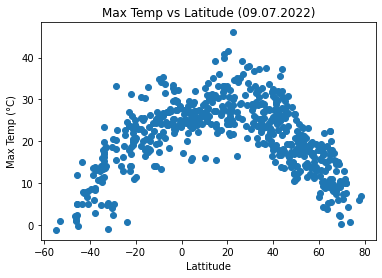

In [89]:
plt.scatter(weather_df["Latitude"],weather_df["Max Temperature (°C)"])
plt.xlabel("Lattitude")
plt.ylabel("Max Temp (°C)")
plt.title("Max Temp vs Latitude (09.07.2022)")

This scatter plot shows the Max tempuratures for the selected cities on 9th July 2022. It clearly indicates that the highest temperatures were just north of the equator, at roughtly latitude 15°. I would assume that this would be due tile of the Earth's axis which creates the summer in the northern hemisphere and winter in the south during July.

Text(0.5, 1.0, 'Humidity vs Latitude (09.07.2022)')

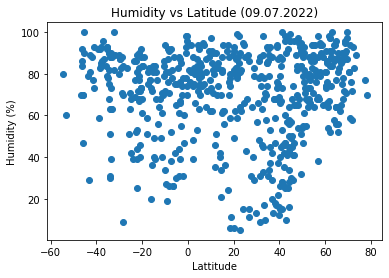

In [90]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity"])
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity vs Latitude (09.07.2022)")

This scatter plot shows humidity vs latitude. I would conclude that there is not a strong relationship here on first glance. However, it appears to be more common that the humidity drops nearer the equator. 

Text(0, 0.5, 'Cloudiness')

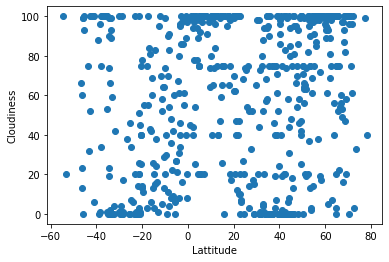

In [87]:
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"])
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Latitude (09.07.2022)")

This scatter plot shows that there is little correlation between the "cloudiness" and the latitude.

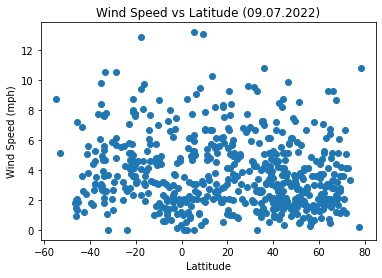

In [91]:
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"])
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed vs Latitude (09.07.2022)")
plt.show()

This scatter plot shows very little correlation for wind speed vs latitude. However, the extreme high winds seem to have occured between 20° and -20°.

In [95]:
north_df = weather_df[weather_df["Latitude"]>0]
south_df = weather_df[weather_df["Latitude"]<0]

<Figure size 432x720 with 0 Axes>

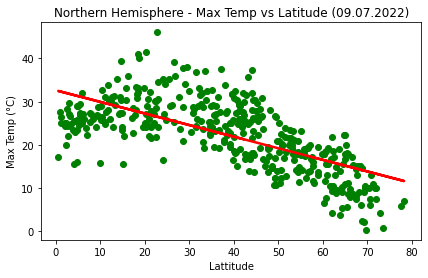

<Figure size 432x720 with 0 Axes>

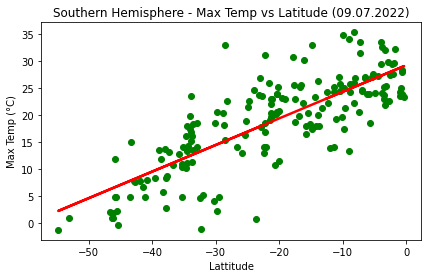

In [144]:
plt.figure().set_figheight(10)
plt.figure().set_figwidth(15)
plt.subplot(1,2,1)

x_values = north_df["Latitude"]
y_values = north_df["Max Temperature (°C)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values,c="g")
plt.plot(x_values,regress_values,c="red", linewidth = 2.5)
plt.xlabel("Lattitude")
plt.ylabel("Max Temp (°C)")
plt.title("Northern Hemisphere - Max Temp vs Latitude (09.07.2022)")

plt.figure().set_figheight(10)
plt.figure().set_figwidth(15)

plt.subplot(1,2,2)


x_values = south_df["Latitude"]
y_values = south_df["Max Temperature (°C)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,c="g")
plt.plot(x_values,regress_values,c="red", linewidth = 2.5)
plt.xlabel("Lattitude")
plt.ylabel("Max Temp (°C)")
plt.title("Southern Hemisphere - Max Temp vs Latitude (09.07.2022)")

plt.show()

Trend Observation 1. 

These graphes both indicate a strong relationship between max temperature and proxiity to the equator. However, the equator does not appear to be the centre point. The centre point seems to be slightly north of the equator, which is expected due to the time of year and the Earth's tilt.

<Figure size 432x720 with 0 Axes>

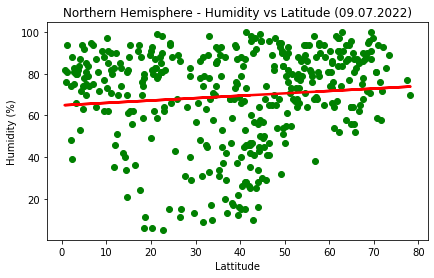

<Figure size 432x720 with 0 Axes>

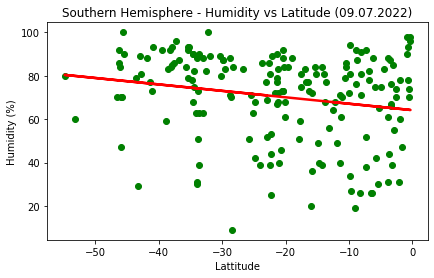

In [149]:
plt.figure().set_figheight(10)
plt.figure().set_figwidth(15)
plt.subplot(1,2,1)

x_values = north_df["Latitude"]
y_values = north_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values,c="g")
plt.plot(x_values,regress_values,c="red", linewidth = 2.5)
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity vs Latitude (09.07.2022)")

plt.figure().set_figheight(10)
plt.figure().set_figwidth(15)

plt.subplot(1,2,2)


x_values = south_df["Latitude"]
y_values = south_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,c="g")
plt.plot(x_values,regress_values,c="red", linewidth = 2.5)
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity vs Latitude (09.07.2022)")

plt.show()

Trend Observation 2

Looks to be a slight correlation with lower humidity nearer the equator. There also appears to be significantly more data for the north than the south. This could be down to sample size, but may also be because of the larger landmasses in the north?

<Figure size 432x720 with 0 Axes>

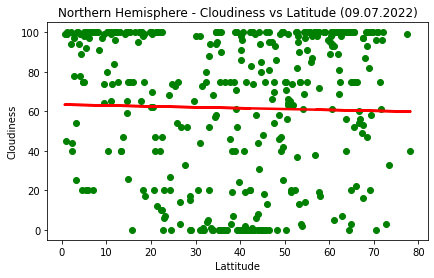

<Figure size 432x720 with 0 Axes>

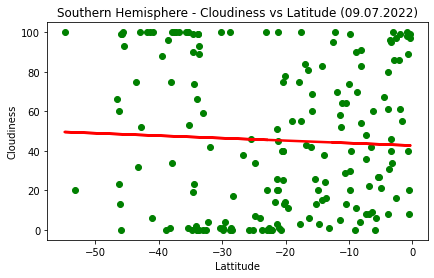

In [150]:
plt.figure().set_figheight(10)
plt.figure().set_figwidth(15)
plt.subplot(1,2,1)

x_values = north_df["Latitude"]
y_values = north_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values,c="g")
plt.plot(x_values,regress_values,c="red", linewidth = 2.5)
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs Latitude (09.07.2022)")

plt.figure().set_figheight(10)
plt.figure().set_figwidth(15)

plt.subplot(1,2,2)


x_values = south_df["Latitude"]
y_values = south_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,c="g")
plt.plot(x_values,regress_values,c="red", linewidth = 2.5)
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness vs Latitude (09.07.2022)")

plt.show()

These graphs shoow that there seems to be no correlation between number of clouds and latitude.

<Figure size 432x720 with 0 Axes>

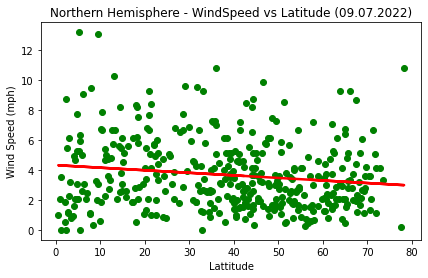

<Figure size 432x720 with 0 Axes>

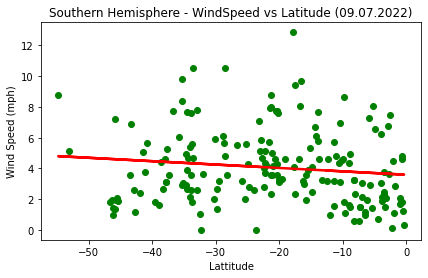

In [151]:
plt.figure().set_figheight(10)
plt.figure().set_figwidth(15)
plt.subplot(1,2,1)

x_values = north_df["Latitude"]
y_values = north_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values,c="g")
plt.plot(x_values,regress_values,c="red", linewidth = 2.5)
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - WindSpeed vs Latitude (09.07.2022)")

plt.figure().set_figheight(10)
plt.figure().set_figwidth(15)

plt.subplot(1,2,2)


x_values = south_df["Latitude"]
y_values = south_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,c="g")
plt.plot(x_values,regress_values,c="red", linewidth = 2.5)
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - WindSpeed vs Latitude (09.07.2022)")

plt.show()

Trend Observation 3. 

These figures show that there is no correlation for windspeeed and latitude. If any correlation can be drawn it suggests that wind speed appears to be stronger the further south you are.

In [153]:
weather_df.to_csv("weather_data.csv", index = False, header = True)